Usando le Figure 1 e 2 dell'articolo come guida. Si osserva che il numero totale di passi orizzontali ad altezza 0 di tutti i cammini 2-Motzkin di lunghezza $n$  è dato dalla seguente espressione:
$$L_0=[z^n]2zC^4=\frac{4n}{(n+1)(n+3)}\binom{2n+2}{n}$$

Il numero totale di passi orizzontali ad altezza 1 di tutti cammini 2-Montzkin di lunghezza $n$ è dato dalla seguente espressione:
$$L_1=[z^n]2z^3C^8=\frac{8}{n+1}\binom{2n+2}{n-3}$$

Il numero totale di passi orizzontali ad altezza generica $k$ di tutti cammini 2-Montzkin di lunghezza $n$ è dato dalla seguente espressione:
$$L_k=[z^n]2z^{2k+1}C^{4k+4}=\sum_{k\geq1}2\binom{2n}{n-1}z^n$$

Dimostriamo sperimentalmente le precedenti identità.

In [1]:
from sympy.abc import * # a collection of already-defined terms, such as `alpha, a, b, x, y, t, ...`
from sympy import *
from commons import *

init_printing()

In [2]:
#crea tutte le possibili sequenze di lunghezza N composte da solo n elementi

def createAllSequenceList(N, n):
    result=[]
    x=[0 for i in range(N)] #inizia costruendo la sequenza nulla
    result.append(x.copy())

    j=N-1
    k=N-1
    while k>=0:
        if x[j]+1==n: #l'elemento della sequenza è massimo
            k=j
            while x[k]+1==n and k>=0: #cerco il primo elenmento non massimo
                k=k-1
            if k>=0:
                x[k]=x[k]+1
                j=N-1
                for i in range(k+1, N): #metto a zero tutti gli elementi a destra di quello implementato
                    x[i] = 0
        else: #l'elemento della sequenza non è il massimo: posso incrementare
            x[j]=x[j]+1
        result.append(x.copy())#aggiungo la sequenza corrente in coda alla lista
    result.pop()
    return result

In [3]:
#Data la lista delle sequenze di dimensione N con numeri fra 0 e 3. Restituisco le sequenze che rappresentano i cammini
#2-Motzkin di lunghezza N

def find2MontzkinPath(N, L):
    temp=L.copy()
    for k in range(len(temp)):
        s=temp[k]       #considero la sequenza k-esima
        stack=[]        
        for i in range(N):
            if s[i]==0:
                stack.append(0)     #uso una pila per ricordami che ho fatto un passo verso l'alto 
            if s[i]==3:
                if len(stack)!=0:
                    stack.remove(0)
                else:
                    temp[k]=0     #le sequenze scartate vengono eliminate ponendo a zero la cella della lista
        if len(stack)>0:    #mi assicuro di essere sull'asse delle x
            temp[k] = 0

    result=[]
    for i in range(len(temp)):   #creo una lista con le sequenze che rappresentano i cammini 2-Motzkin: ignoro gli 0 
        if temp[i]!=0:
            result.append(temp[i])
    return result


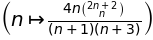

In [4]:
#definisco L0
L0=Lambda([n], 4*n/((n+1)*(n+3))*binomial(2*n+2,n))
L0

In [5]:
#definisco L1
L1=Lambda([n], 8/(n+1)*binomial(2*n+2,n-3))
L1

In [15]:
#definisco Lk
Lk=Lambda([n], 2*binomial(2*n, n-1))
Lk

In [7]:
from math import ceil

In [8]:
#Determina per una sequenza 2-Motzkin di lunghezza N il numero di passi orizzontali a ciascun livello. Restituisce un array in cui in ogni cella i
#viene riportato il numero di passi orizzontali a livello i.
def numberOfLevelStepsSequence(S):
    N=len(S)
    r=[]
    n=ceil(N/2)
    for i in range(n):
        r.append(0)

    level=0
    for step in S:
        if step==0:
            level=level+1
        elif step==3:
            level=level-1
        else:
            if step==1 or step==2:
                r[level]=r[level]+1

    return r


In [9]:
#Calcolo il numero totale di passi orizzontali per ogni sequenza 2-Motzkin di lunghezza N. Restituisce un array contenente in ogni cella i
#il totale dei passi orizzontali al livello i.
def numberOfLevelSteps(N, L):
    numberOfSteps = []
    for i in range(len(L)):
        r = numberOfLevelStepsSequence(L[i])
        r=r.copy()
        if i==0:
            numberOfSteps=r
        else:
            for j in range(len(r)):
                numberOfSteps[j]=numberOfSteps[j]+r[j]

    return numberOfSteps

In [10]:
#Uso questa procedura per dimostrare che valgono le identità
def provaTutte(N, level):
    numberOfSteps=0
    L=createAllSequenceList(N, 4)
    L=find2MontzkinPath(N, L)
    r=numberOfLevelSteps(N,L)
    if level==-1:
        sum=0
        for c in r:
            sum=sum+c
        numberOfSteps=sum
    elif level==0:
        numberOfSteps=r[level]
    else:
        if len(r)==1:
            numberOfSteps=0  
        else:
            numberOfSteps=r[level] 
    return numberOfSteps
            

In [11]:
#Livello 0
[[provaTutte(i, 0), L0(i)] for i in range(1,10)]

In [14]:
#livello 1
[[provaTutte(i, 1), L1(i)] for i in range(1,10)]

In [13]:
#livello generico k
[[provaTutte(i, -1), Lk(i)] for i in range(1,10)]